In [1]:
import pandas as pd #Import packages
import geopandas as gpd
import skfuzzy as fuzz
import numpy as np 
from skfuzzy import control as ctrl

In [2]:
ones = ctrl.Antecedent(np.arange(0,1, 0.01), 'ones') # Antecedent functions set the fuzzy range for input data sources
speed = ctrl.Antecedent(np.arange(0,30,0.1), 'speed') # ones should be the CT rate from HMM classification, speed can be generated from GPS points
resting = ctrl.Consequent(np.arange(0,1,0.01), 'resting') # Consequent sets the fuzzy range for each of the output classes
High = ctrl.Consequent(np.arange(0,1,0.01), 'High_act') # (domain_lower, domain_upper, increment,class name)
low = ctrl.Consequent(np.arange(0,1,0.01), 'low_act')
myfeat = [ones,speed,resting,High,low] # list of all the possible features

c:\ProgramData\Anaconda3\envs\geopandas_docs\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


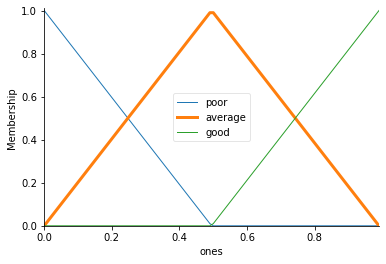

In [3]:
for x in myfeat:
    x.automf(3) # this sets up the fuzzy set with poor, average, and good
ones['average'].view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

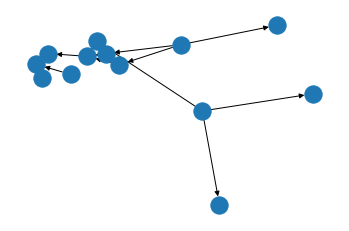

In [4]:
rule1 = ctrl.Rule(ones['poor'], resting['good']) # These functions set the fuzzy rules in the format: input type, output type
rule2 = ctrl.Rule(ones['poor'], low['poor']) 
rule3 = ctrl.Rule(ones['poor'], High['poor'])
rule4 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], resting['poor'])
rule5 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], low['average'])
rule6 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], High['good'])
rule7 = ctrl.Rule(ones['good'] & speed['poor'], resting['poor'])
rule8 = ctrl.Rule(ones['good'] & speed['poor'], low['good'])
rule9 = ctrl.Rule(ones['good'] & speed['poor'], High['good'])
rule4.view()

In [5]:
rule_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]) # Creates a fuzzy system based on your rules
fuzzysys = ctrl.ControlSystemSimulation(rule_ctrl)

0.4949999999999999


c:\ProgramData\Anaconda3\envs\geopandas_docs\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


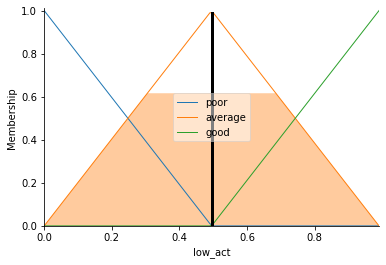

In [6]:
fuzzysys.input['ones'] = 0.8 # This is testing the fuzzy system
fuzzysys.input['speed'] = 50
fuzzysys.compute()
print(fuzzysys.output['low_act'])
low.view(sim = fuzzysys)

In [48]:
df = gpd.read_file(r'803HMM_SP.shp') # Read in a HMM classification shapefile
df[df['speed'] < 50] # filter to believable speeds
df

,GMT Time,Latitude,Longitude,Altitude,Duration,Temperatur,Voltage,DOP,Satellites,Cause of F,...,Lab_Alt,No,time,distance,speed,Status,MT Time,ones,zeros,geometry
0,6/29/2021 15:45,36.552505,-109.229454,2002.18,1,17.5,0,1.4,6,GPS Schedule,...,0.0,1,6/29/2021 9:45,-1.000000,-1.000000,3.64591,2021-06-29 09:45:00,0.728814,0.271186,POINT (658462.010 4046690.617)
1,6/29/2021 16:00,36.552389,-109.229637,1994.45,2,18.0,0,1.4,6,GPS Schedule,...,0.0,2,6/29/2021 10:00,20.903414,1.238903,17.54920,2021-06-29 10:00:00,0.474576,0.525424,POINT (658445.833 4046677.379)
2,6/29/2021 16:15,36.552576,-109.229857,1999.98,4,17.0,0,1.4,6,GPS Schedule,...,0.0,3,6/29/2021 10:15,28.652691,0.991692,33.84900,2021-06-29 10:15:00,0.338983,0.661017,POINT (658425.740 4046697.806)
3,6/29/2021 16:30,36.552478,-109.229836,1991.11,2,16.5,0,1.6,5,GPS Schedule,...,0.0,4,6/29/2021 10:30,11.014981,1.362767,30.81930,2021-06-29 10:30:00,0.576271,0.423729,POINT (658427.829 4046686.991)
4,6/29/2021 16:45,36.552096,-109.229944,2004.69,1,16.5,0,1.6,5,GPS Schedule,...,0.0,5,6/29/2021 10:45,43.495681,1.740857,59.96550,2021-06-29 10:45:00,0.101695,0.898305,POINT (658418.996 4046644.402)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,10/8/2021 17:01,36.474647,-109.097766,2449.80,63,20.0,0,4.2,5,GPS Schedule,...,0.0,6066,10/8/2021 11:01,9.303141,1.085983,14622.80000,2021-10-08 11:01:00,1.000000,0.000000,POINT (670419.879 4038277.990)
5346,10/8/2021 17:15,36.474341,-109.097732,2447.03,3,20.5,0,3.4,5,GPS Schedule,...,0.0,6067,10/8/2021 11:15,34.136168,6.290992,14645.40000,2021-10-08 11:15:00,1.000000,0.000000,POINT (670423.605 4038244.057)
5347,10/8/2021 17:30,36.475777,-109.096080,2709.08,4,21.0,0,3.0,4,GPS Schedule,...,0.0,6068,10/8/2021 11:30,217.503513,10.686962,14671.70000,2021-10-08 11:30:00,0.830508,0.169492,POINT (670568.439 4038406.326)
5348,10/8/2021 17:45,36.474314,-109.097565,2452.82,51,21.0,0,1.4,5,GPS Schedule,...,0.0,6069,10/8/2021 11:45,209.974959,5.303947,14659.20000,2021-10-08 11:45:00,0.966102,0.033898,POINT (670438.593 4038241.312)


In [49]:
ind_list = df.index.to_list() # create a list of the index (for faster looping)
df['Resting'] = None 
df['Low_activity'] = None
df['High_activity'] = None # Create these
for x in ind_list:
    ones = df.loc[x,'ones'] # set the ones and speed values
    speed=  df.loc[x,'speed']
    fuzzysys.input['ones'] = ones 
    fuzzysys.input['speed'] = speed
    fuzzysys.compute() # Compute the fuzzy system
    df.loc[x,'Resting'] = float(fuzzysys.output['resting']) # Set each class to it's fuzzy output
    df.loc[x,'Low_activity'] = float(fuzzysys.output['low_act'])
    df.loc[x,'High_activity'] = float(fuzzysys.output['High_act'])

In [50]:
df.loc[:,'Resting'] = df.loc[:,'Resting'].astype('float') # set all of the system types as float
df.loc[:,'Low_activity'] = df.loc[:,'Low_activity'].astype('float')
df.loc[:,'High_activity']= df.loc[:,'High_activity'].astype('float')

In [51]:
df.to_file('803_HMMSup_FZ.shp') # save your shapefile

C:\Users\chris\AppData\Local\Temp/ipykernel_4508/3193249471.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('803_HMMSup_FZ.shp')
